## Parte 1 - Importação das bibliotecas utilizadas


In [1]:
# Importação da biblioteca Pandas para manipulação dos dados
import pandas as pd

# Biblioteca Seaborn para criação de gráficos
import seaborn as sns

# Biblioteca Matplotlib para criação de gráficos
import matplotlib.pyplot as plt

# Biblioteca para ignorar mensagens de avisos (warning) ao rodar uma cédula de código
import warnings
warnings.filterwarnings('ignore')

---
## Parte 2 - Importação dos Dados

In [2]:
# Função read_csv para importar os dados do diretório do computador
dados = pd.read_csv('dados_salarial_funcionarios.csv')

In [3]:
# Listando o nome das colunas
dados.columns

Index(['Idade', 'Genero', 'Nivel Ensino', 'Area Formacao', 'Setor', 'Nivel',
       'Faixa Salarial', 'Anos experiencia', 'Faixa Salarial – numero',
       'Data ultimo aumento'],
      dtype='object')

In [4]:
# Imprimindo as 5 primeiras linhas
dados.head()

,Idade,Genero,Nivel Ensino,Area Formacao,Setor,Nivel,Faixa Salarial,Anos experiencia,Faixa Salarial – numero,Data ultimo aumento
0,38,Masculino,Pós-graduação,Química / Física,Marketing,Gestor,de R$ 4.001/mês a R$ 6.000/mês,Mais de 10 anos,6000,02/01/21
1,39,Masculino,Pós-graduação,Economia/ Administração / Contabilidade / Fina...,Consultoria,Gestor,de R$ 6.001/mês a R$ 8.000/mês,de 2 a 3 anos,8000,06/04/21
2,30,Masculino,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Indústria,Gestor,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,12000,15/04/23
3,38,Feminino,Pós-graduação,Outras,Serviços,Gestor,de R$ 12.001/mês a R$ 16.000/mês,Mais de 10 anos,16000,04/06/21
4,36,Masculino,Pós-graduação,Outras Engenharias,Varejo,Gestor,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,12000,22/03/23


In [5]:
# Observando número de linhas e colunas
dados.shape

(1385, 10)

---
## Parte 3: Análise Exploratória dos Dados(AED)

### Ter uma primeira visão sobre os dados e extrair os primeiros insights

In [6]:
# Imprime o tipo de dado em cada coluna: object - variáveis categóricas, float64 e int64 - variáveis numéricas
dados.dtypes

Idade                       int64
Genero                     object
Nivel Ensino               object
Area Formacao              object
Setor                      object
Nivel                      object
Faixa Salarial             object
Anos experiencia           object
Faixa Salarial – numero     int64
Data ultimo aumento        object
dtype: object

In [7]:
# Convertendo o campo Data para datetime, utilizando a função to_datetime do Pandas
dados['Data ultimo aumento'] = pd.to_datetime(dados['Data ultimo aumento'])

In [8]:
# Verificando a alteração
dados.head()

,Idade,Genero,Nivel Ensino,Area Formacao,Setor,Nivel,Faixa Salarial,Anos experiencia,Faixa Salarial – numero,Data ultimo aumento
0,38,Masculino,Pós-graduação,Química / Física,Marketing,Gestor,de R$ 4.001/mês a R$ 6.000/mês,Mais de 10 anos,6000,2021-02-01
1,39,Masculino,Pós-graduação,Economia/ Administração / Contabilidade / Fina...,Consultoria,Gestor,de R$ 6.001/mês a R$ 8.000/mês,de 2 a 3 anos,8000,2021-06-04
2,30,Masculino,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Indústria,Gestor,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,12000,2023-04-15
3,38,Feminino,Pós-graduação,Outras,Serviços,Gestor,de R$ 12.001/mês a R$ 16.000/mês,Mais de 10 anos,16000,2021-04-06
4,36,Masculino,Pós-graduação,Outras Engenharias,Varejo,Gestor,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,12000,2023-03-22


In [9]:
# Criando categorias para separar colunas numéricas e categóricas, para facilitar a AED
numericas_cols = [col for col in dados.columns if dados[col].dtype != 'object']
categoricas_cols = [col for col in dados.columns if dados[col].dtype == 'object']

In [10]:
# Resumo das variáveis numéricas - Imprime alguns valores de medidas de tendências centrais
dados[numericas_cols].describe()

,Idade,Faixa Salarial – numero,Data ultimo aumento
count,1385.000000,1385.000000,1385
mean,30.779783,9992.779783,2022-06-15 08:25:17.978339328
min,18.000000,1000.000000,2021-01-01 00:00:00
25%,26.000000,6000.000000,2021-09-19 00:00:00
50%,29.000000,8000.000000,2022-06-09 00:00:00
75%,34.000000,12000.000000,2023-03-05 00:00:00
max,54.000000,45000.000000,2023-12-28 00:00:00
std,6.869018,7353.675097,NaN


In [11]:
# Resumo das variáveis categóricas - Imprime alguns valores de estatística descritiva
dados[categoricas_cols].describe()

,Genero,Nivel Ensino,Area Formacao,Setor,Nivel,Faixa Salarial,Anos experiencia
count,1385,1385,1361,1385,1385,1385,1385
unique,2,6,9,23,4,13,6
top,Masculino,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,Tecnologia/Fábrica de Software,Pleno,de R$ 8.001/mês a R$ 12.000/mês,de 2 a 3 anos
freq,979,495,588,372,440,295,314


In [12]:
# Verificando se existem valores faltantes nos dados
dados.isna().any()

Idade                      False
Genero                     False
Nivel Ensino               False
Area Formacao               True
Setor                      False
Nivel                      False
Faixa Salarial             False
Anos experiencia           False
Faixa Salarial – numero    False
Data ultimo aumento        False
dtype: bool

In [13]:
# Verificando a quantidade de valores faltantes por coluna
dados.isna().sum()

Idade                       0
Genero                      0
Nivel Ensino                0
Area Formacao              24
Setor                       0
Nivel                       0
Faixa Salarial              0
Anos experiencia            0
Faixa Salarial – numero     0
Data ultimo aumento         0
dtype: int64

In [14]:
# Substituir os valores faltantes por "Nada consta". Argumento inplace = true significa que a modificação será aplicada
# Na mesma variável chamada dados sem precisar criar outra variável
dados['Area Formacao'].fillna('Nada Consta', inplace=True)

In [ ]:
# Caso a coluna faltante não for relevante é possivel excluir
dados.drop('Area Formacao', axis=1, inplace=True)

In [15]:
# Após as correções verificando se ainda há valores faltantes
dados.isna().sum()

Idade                      0
Genero                     0
Nivel Ensino               0
Area Formacao              0
Setor                      0
Nivel                      0
Faixa Salarial             0
Anos experiencia           0
Faixa Salarial – numero    0
Data ultimo aumento        0
dtype: int64

In [16]:
# Verificando se tem valores duplicados
dados.duplicated().sum()

0

In [ ]:
# Removendo valores duplicados
dados.drop_duplicates(inplace=True)

In [17]:
# Número de linhas e colunas após mudanças
dados.shape

(1385, 10)

In [18]:
# Contagem de valores por categoria de 'Nivel'
dados['Nivel'].value_counts()

Nivel
Pleno     440
Júnior    409
Sênior    370
Gestor    166
Name: count, dtype: int64

In [19]:
# Contagem de valores por categorias de 'Faixa Salarial'
dados['Faixa Salarial'].value_counts()

Faixa Salarial
de R$ 8.001/mês a R$ 12.000/mês     295
de R$ 6.001/mês a R$ 8.000/mês      255
de R$ 4.001/mês a R$ 6.000/mês      242
de R$ 12.001/mês a R$ 16.000/mês    140
de R$ 3.001/mês a R$ 4.000/mês      113
de R$ 2.001/mês a R$ 3000/mês       108
de R$ 1.001/mês a R$ 2.000/mês       79
de R$ 16.001/mês a R$ 20.000/mês     59
de R$ 20.001/mês a R$ 25.000/mês     26
de R$ 25.001/mês a R$ 30.000/mês     22
Menos de R$ 1.000/mês                19
de R$ 30.001/mês a R$ 40.000/mês     18
Acima de R$ 40.001/mês                9
Name: count, dtype: int64

In [38]:
# Criando uma nova coluna
# Função para calcular a média salarial dos funcionários
dados['Média Salarial'] = dados['Faixa Salarial – numero'].mean().round()

In [21]:
# Resultado após inserção de nova coluna
dados.head()

,Idade,Genero,Nivel Ensino,Area Formacao,Setor,Nivel,Faixa Salarial,Anos experiencia,Faixa Salarial – numero,Data ultimo aumento
0,38,Masculino,Pós-graduação,Química / Física,Marketing,Gestor,de R$ 4.001/mês a R$ 6.000/mês,Mais de 10 anos,6000,2021-02-01
1,39,Masculino,Pós-graduação,Economia/ Administração / Contabilidade / Fina...,Consultoria,Gestor,de R$ 6.001/mês a R$ 8.000/mês,de 2 a 3 anos,8000,2021-06-04
2,30,Masculino,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Indústria,Gestor,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,12000,2023-04-15
3,38,Feminino,Pós-graduação,Outras,Serviços,Gestor,de R$ 12.001/mês a R$ 16.000/mês,Mais de 10 anos,16000,2021-04-06
4,36,Masculino,Pós-graduação,Outras Engenharias,Varejo,Gestor,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,12000,2023-03-22


---
## Parte 4: Visualização dos resultados
### O que queremos responder com esses dados?
### 1. Distribuição do número de funcionários por sexo, nível de senioridade e nível de formação
#### Podemos fazer um gráfico com a distribuição de homens e mulheres


In [22]:
# Contagem do número de homens e mulheres na empresa
dados['Genero'].value_counts()

Genero
Masculino    979
Feminino     406
Name: count, dtype: int64

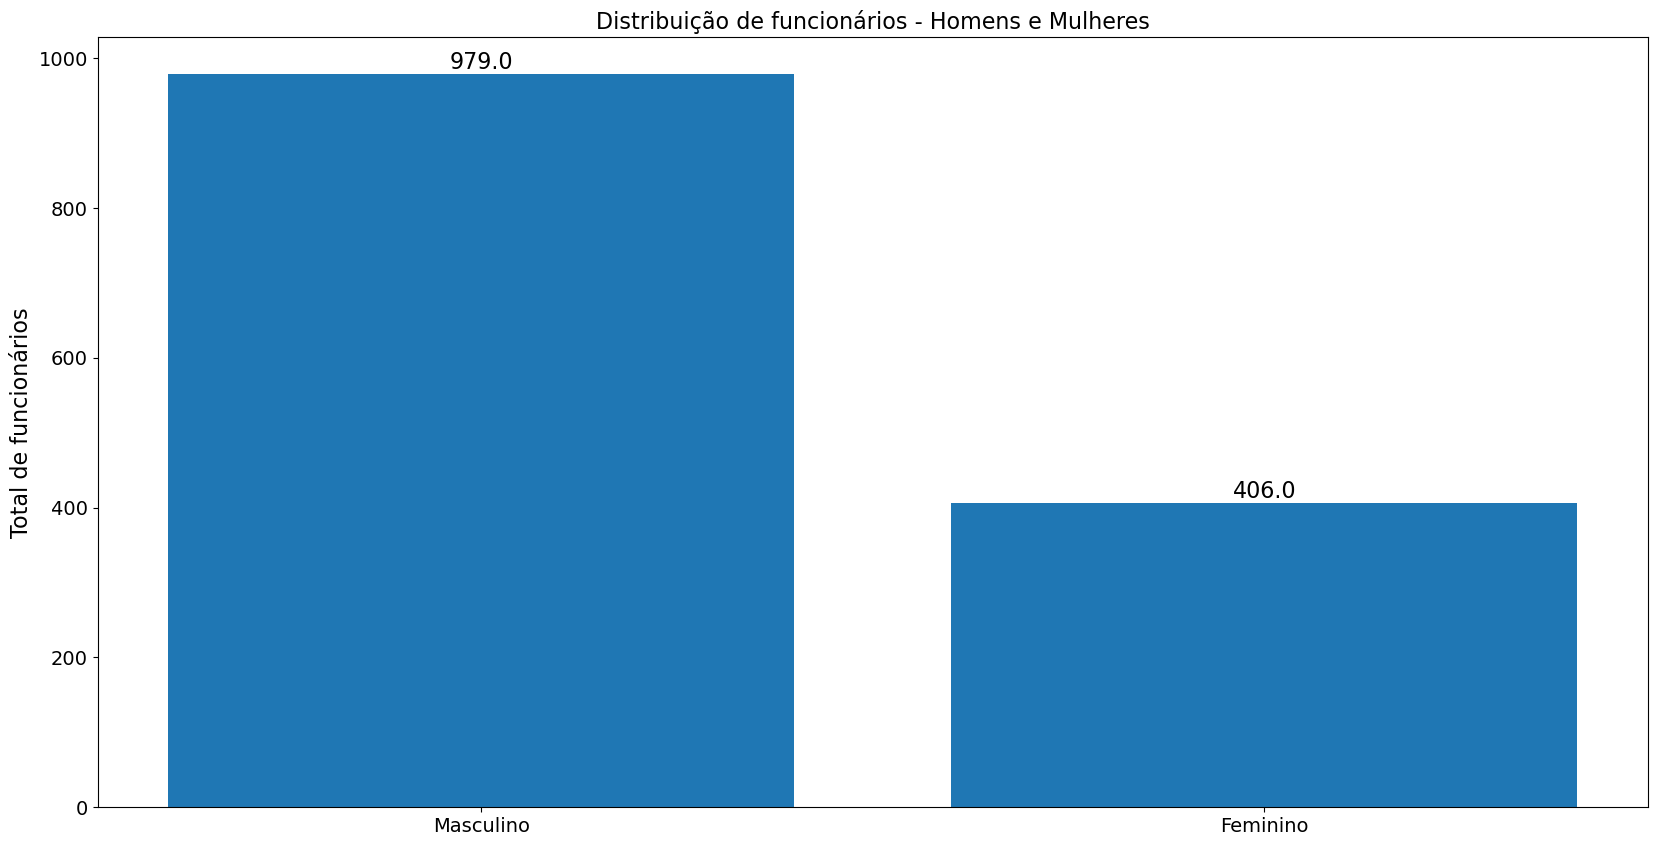

In [23]:
# Gráfico da distribuição por gênero - plt é a biblioteca Matplotlib
plt.figure(figsize=(20,10)) # Aumentar o tamanho da figura na saída dos dados
grafico_1 = plt.bar(dados['Genero'].unique(), dados['Genero'].value_counts()) # plt.bar para gráfico de barras
plt.title('Distribuição de funcionários - Homens e Mulheres', fontsize=16) # plt.title para inserir título no gráfico
plt.ylabel('Total de funcionários', fontsize=16) # plt.ylabel para inserir titulo no gráfico

# Aumentar o tamanho do texto dos eixos
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

# Colocando o rótulo nas barras
plt.bar_label(grafico_1, fmt="%.01f", size=16, label_type="edge");

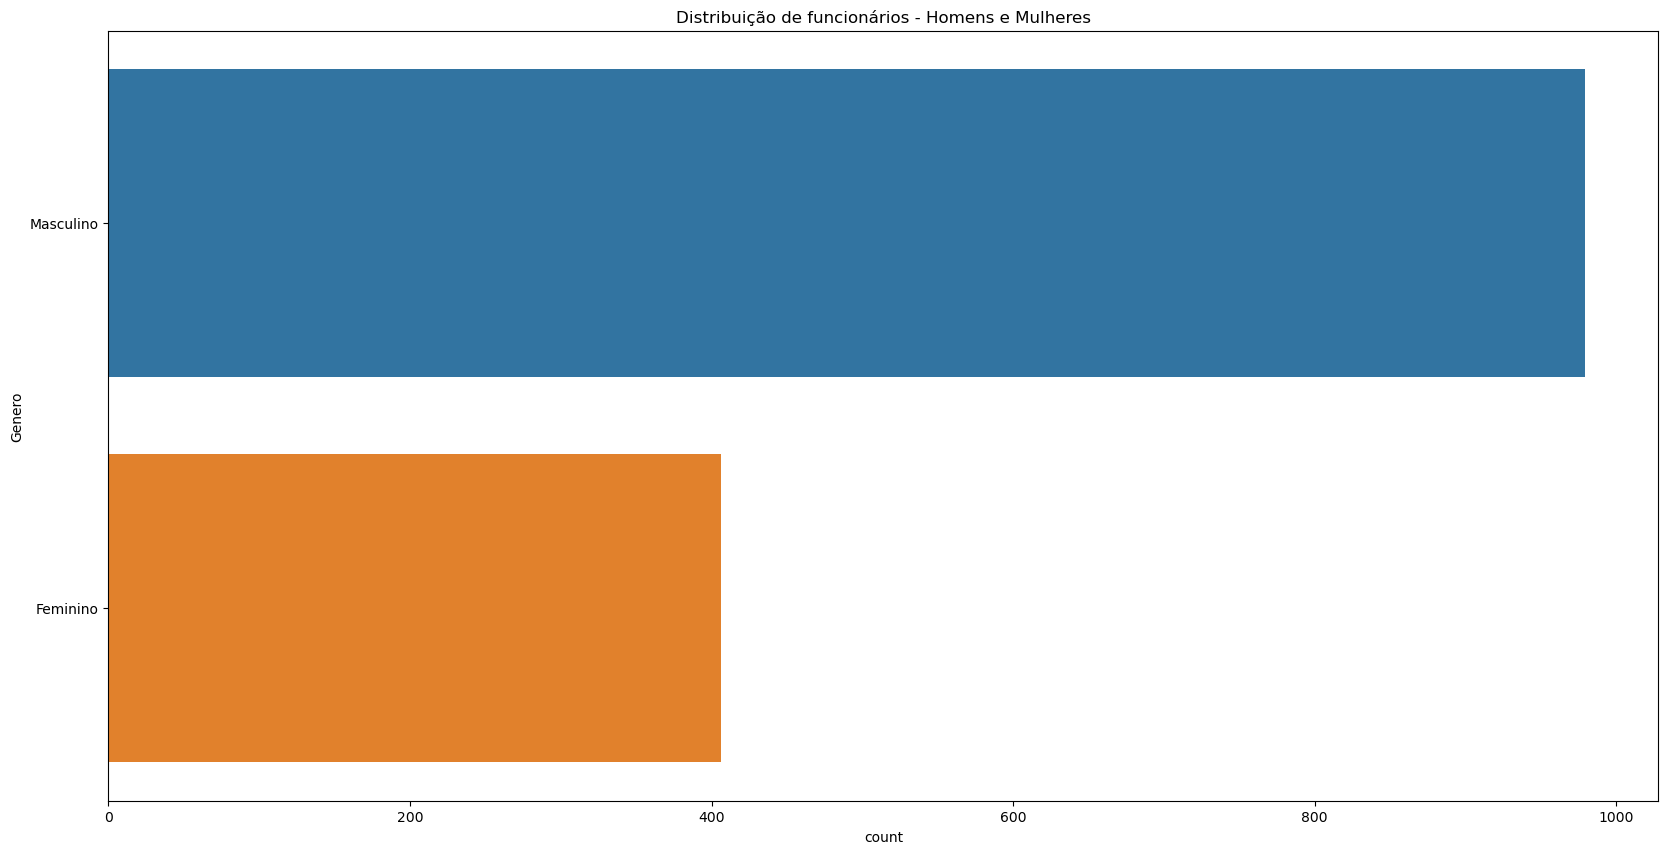

In [24]:
# Gráfico da biblioteca sns - Seaborn

# sns.countplot para criar gráfico de barras. Eixo X é a contagem (Número de valores), eixo Y é a coluna de ordenação
# index para ordenar os valores
plt.figure(figsize=(20, 10))
sns.countplot(y="Genero", data=dados, order=dados['Genero'].value_counts().index) \
.set_title("Distribuição de funcionários - Homens e Mulheres"); # set.title para inserir nome do gráfico

## De acordo com o nível de formação

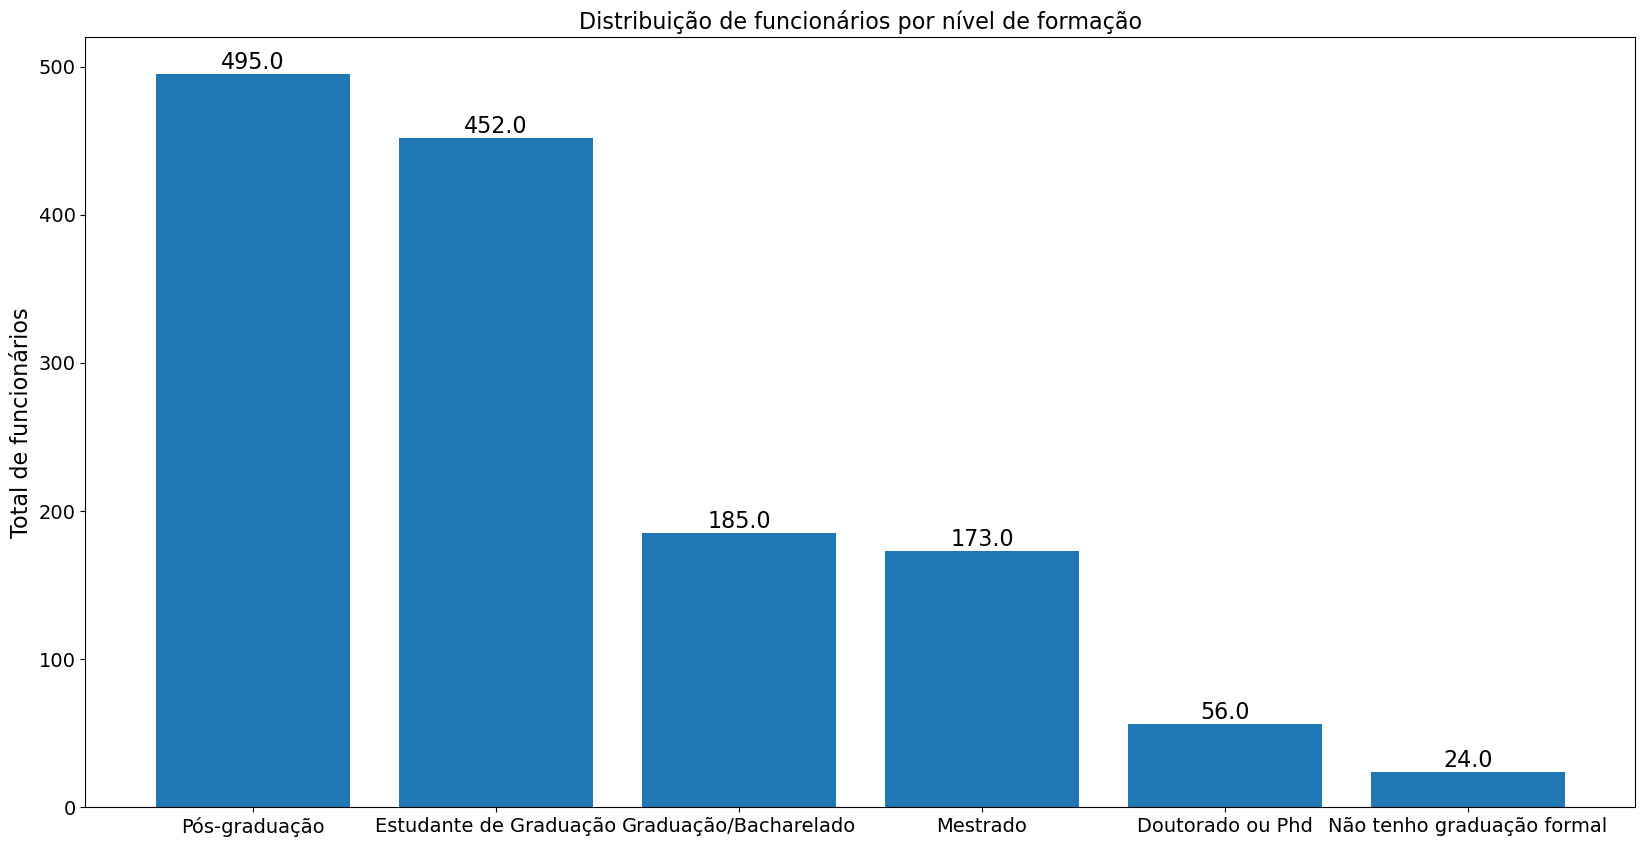

In [25]:
plt.figure(figsize=(20,10))
grafico_2 = plt.bar(dados['Nivel Ensino'].unique(), dados['Nivel Ensino'].value_counts())
plt.title('Distribuição de funcionários por nível de formação', fontsize = 16) # Inserindo o título
plt.ylabel('Total de funcionários', fontsize = 16) # Rótulo do eixo Y

# Aumentar o tamanho do texto dos eixos
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

# Colocando o rótulo nas barras
plt.bar_label(grafico_2, fmt="%.01f", size=16, label_type="edge");

### Por nível de senioridade

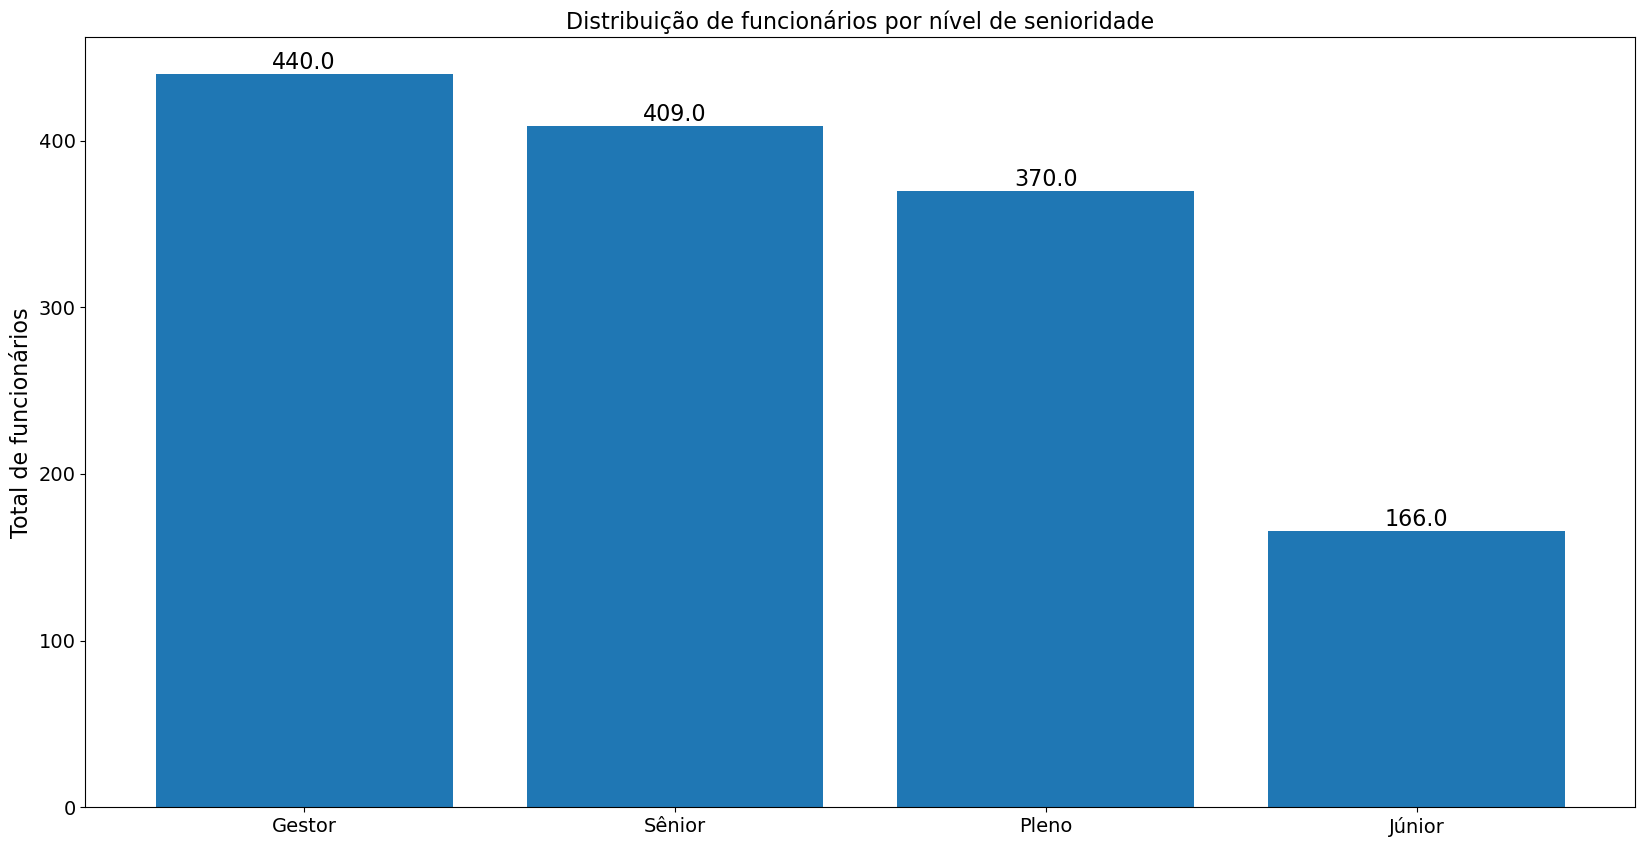

In [26]:
plt.figure(figsize=(20,10))
grafico_3 = plt.bar(dados['Nivel'].unique(), dados['Nivel'].value_counts())
plt.title('Distribuição de funcionários por nível de senioridade', fontsize = 16)
plt.ylabel('Total de funcionários', fontsize = 16)

# Aumentar o tamanho do texto dos eixos
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

# Colocando o rótulo nas barras
plt.bar_label(grafico_3, fmt="%.01f", size=16, label_type="edge");

---
## 2. Evolução da média salarial ao longo do tempo, com base na data de último aumento

In [27]:
# Criando uma coluna somente com o ano de aumento
dados['Data ultimo aumento - Ano'] = dados['Data ultimo aumento'].dt.year

In [32]:
# Transformando a coluna ano em categoria
dados['Data ultimo aumento - Ano'] = dados['Data ultimo aumento - Ano'].astype(str)
dados.dtypes

Idade                                 int64
Genero                               object
Nivel Ensino                         object
Area Formacao                        object
Setor                                object
Nivel                                object
Faixa Salarial                       object
Anos experiencia                     object
Faixa Salarial – numero               int64
Data ultimo aumento          datetime64[ns]
Data ultimo aumento - Ano            object
dtype: object

In [39]:
# Calculando a média por ano (coluna Data ultimo aumento - Ano) para saber se os salários aumentaram ou diminuíram
media_salarial_ano = dados.groupby(['Data ultimo aumento - Ano', 'Genero'])['Faixa Salarial – numero'].mean().round(0) # round para arredondar o valor
media_salarial_ano.head()

Data ultimo aumento - Ano  Genero   
2021                       Feminino      9695.0
                           Masculino     9495.0
2022                       Feminino      9331.0
                           Masculino    11271.0
2023                       Feminino      9440.0
Name: Faixa Salarial – numero, dtype: float64

In [40]:
# Utilizando a função reset_index para criar uma ordem e facilitar a criação do gráfico
media_salarial_ano = media_salarial_ano.reset_index(name='Salario Medio')
media_salarial_ano.head()

,Data ultimo aumento - Ano,Genero,Salario Medio
0,2021,Feminino,9695.0
1,2021,Masculino,9495.0
2,2022,Feminino,9331.0
3,2022,Masculino,11271.0
4,2023,Feminino,9440.0


(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 [Text(0, 0.0, '0'),
  Text(0, 2000.0, '2000'),
  Text(0, 4000.0, '4000'),
  Text(0, 6000.0, '6000'),
  Text(0, 8000.0, '8000'),
  Text(0, 10000.0, '10000'),
  Text(0, 12000.0, '12000')])

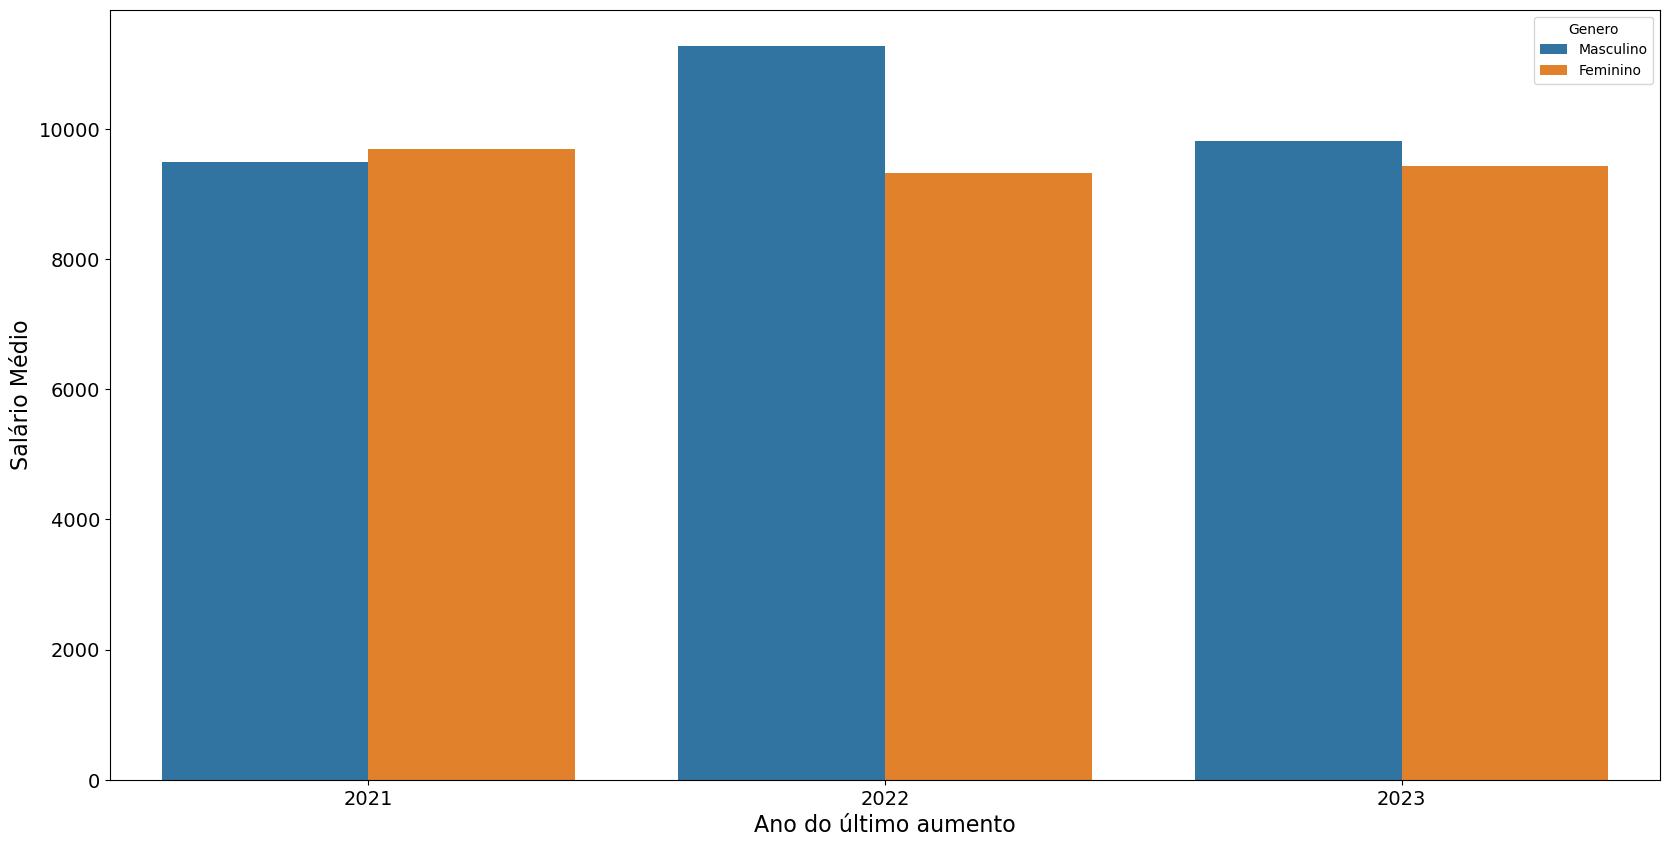

In [41]:
# Visualizando a média salarial por ano
plt.figure(figsize=(20,10))# Aumentar tamanho da imagem que será impressa na tela
sns.barplot(x='Data ultimo aumento - Ano', y='Salario Medio', hue='Genero', data=media_salarial_ano, hue_order=['Masculino', 'Feminino'])

# Nomeando os eixos
plt.ylabel('Salário Médio', fontsize = 16)
plt.xlabel('Ano do último aumento', fontsize = 16)

# aumentar o tamanho do texto dos eixos
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)


### Houve um aumento médio no salário dos funcionários entre 2021 e 2022. Entre 2022 e 2023 houve uma queda

---
## 3. Distribuição salarial por nível de senioridade e gênero

In [49]:
# Agrupamento por gênero e nível do cargo - Júnior, Pleno, Sênior e Gestão
# Cálculo da média por nível do cargo e gênero
media_nivel_cargo = dados.groupby(['Genero', 'Nivel'])['Faixa Salarial – numero'].mean()
media_nivel_cargo.head()

Genero     Nivel 
Feminino   Gestor    16491.803279
           Júnior     4985.074627
           Pleno      8910.569106
           Sênior    12386.363636
Masculino  Gestor    16514.285714
Name: Faixa Salarial – numero, dtype: float64

In [51]:
# Utilizando a função reset_index para criar uma ordem e facilitar a criação do gráfico
media_nivel_cargo = media_nivel_cargo.reset_index(name='Salario Medio')
media_nivel_cargo.head()

,Genero,Nivel,Salario Medio
0,Feminino,Gestor,16491.803279
1,Feminino,Júnior,4985.074627
2,Feminino,Pleno,8910.569106
3,Feminino,Sênior,12386.363636
4,Masculino,Gestor,16514.285714


(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000., 18000.]),
 [Text(0, 0.0, '0'),
  Text(0, 2000.0, '2000'),
  Text(0, 4000.0, '4000'),
  Text(0, 6000.0, '6000'),
  Text(0, 8000.0, '8000'),
  Text(0, 10000.0, '10000'),
  Text(0, 12000.0, '12000'),
  Text(0, 14000.0, '14000'),
  Text(0, 16000.0, '16000'),
  Text(0, 18000.0, '18000')])

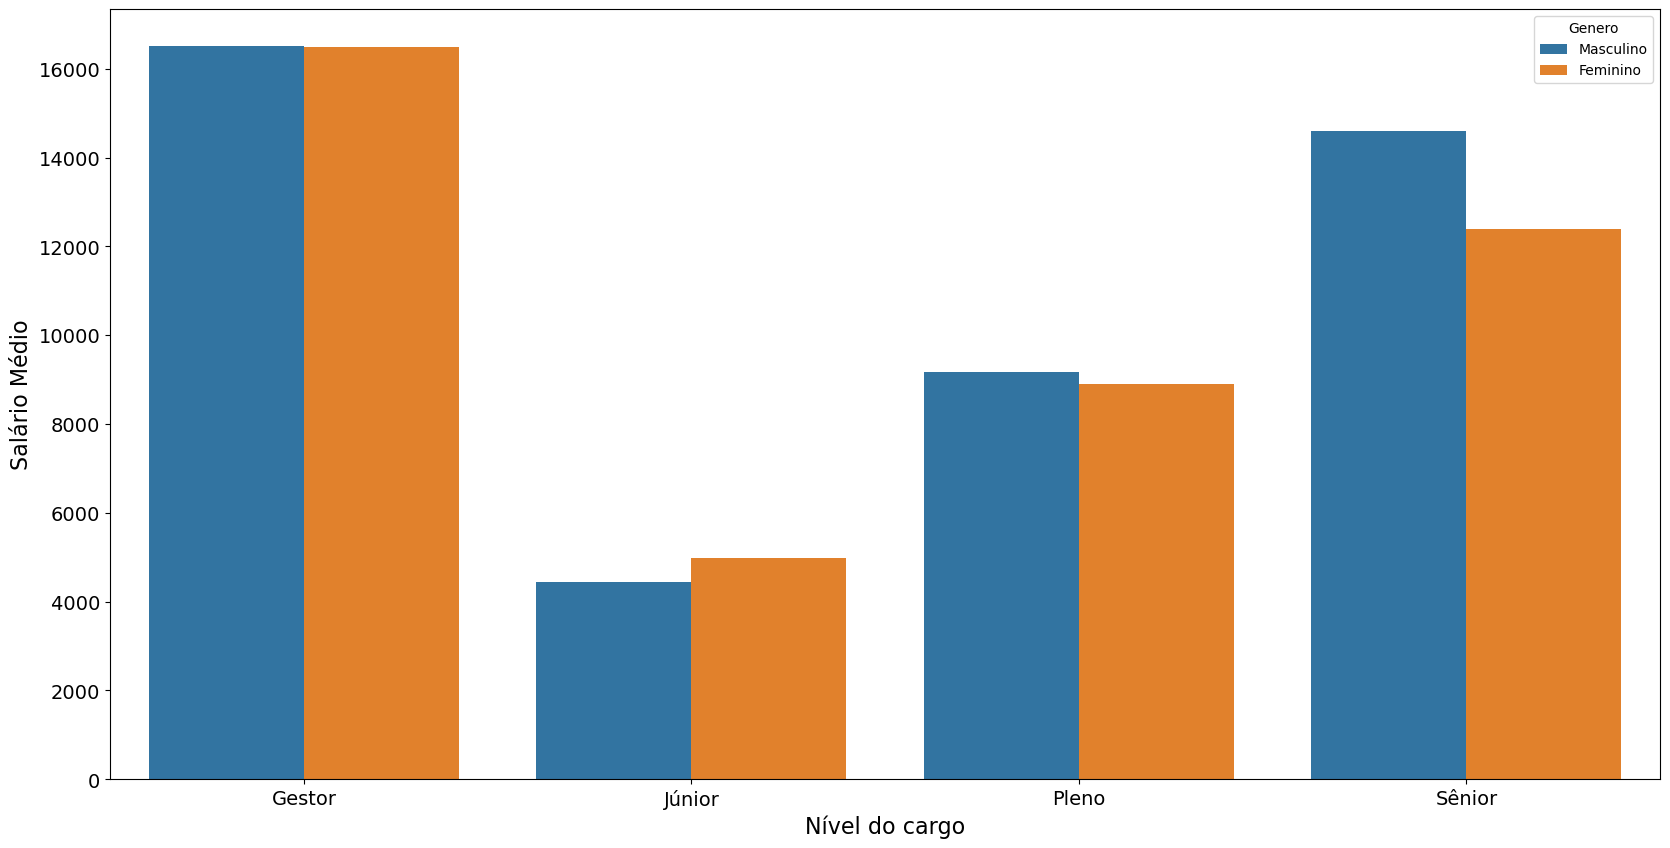

In [52]:
# Visualizando a média salarial por nível do cargo
plt.figure(figsize=(20,10))
sns.barplot(x='Nivel', y='Salario Medio', hue='Genero', data=media_nivel_cargo, hue_order=['Masculino', 'Feminino'])

# Nomeando os eixos
plt.ylabel('Salário Médio', fontsize = 16)
plt.xlabel('Nível do cargo', fontsize = 16)

# Aumentar o tamanho do texto dos eixos
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

---
## 4. Distribuição salarial por anos de experiência e gênero
### Analisndo os salários
#### Primeiro fazendo um histograma para analisar a distribuição geral dos salários

<Axes: >

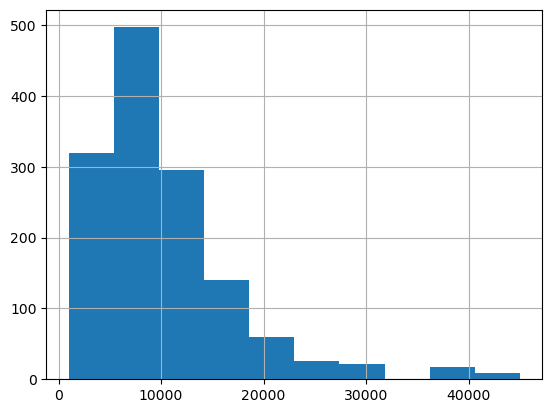

In [53]:
dados['Faixa Salarial – numero'].hist()

In [54]:
# Agrupamento por gênero e anos de experiência
# Cálculo da média por anos de experiência e gênero
media_anos_experiencia = dados.groupby(['Genero', 'Anos experiencia'])['Faixa Salarial – numero'].mean()
media_anos_experiencia.head()

Genero    Anos experiencia
Feminino  Mais de 10 anos     15083.333333
          Menos de 1 ano       5388.888889
          de 1 a 2 anos        7540.229885
          de 2 a 3 anos        9512.195122
          de 4 a 5 anos       11685.714286
Name: Faixa Salarial – numero, dtype: float64

In [55]:
# Utilizando a função reset_index para criar uma ordem e facilitar a criação do gráfico
media_anos_experiencia = media_anos_experiencia.reset_index(name='Salario Medio')
media_anos_experiencia.head()

,Genero,Anos experiencia,Salario Medio
0,Feminino,Mais de 10 anos,15083.333333
1,Feminino,Menos de 1 ano,5388.888889
2,Feminino,de 1 a 2 anos,7540.229885
3,Feminino,de 2 a 3 anos,9512.195122
4,Feminino,de 4 a 5 anos,11685.714286


(array([    0.,  2500.,  5000.,  7500., 10000., 12500., 15000., 17500.,
        20000.]),
 [Text(0, 0.0, '0'),
  Text(0, 2500.0, '2500'),
  Text(0, 5000.0, '5000'),
  Text(0, 7500.0, '7500'),
  Text(0, 10000.0, '10000'),
  Text(0, 12500.0, '12500'),
  Text(0, 15000.0, '15000'),
  Text(0, 17500.0, '17500'),
  Text(0, 20000.0, '20000')])

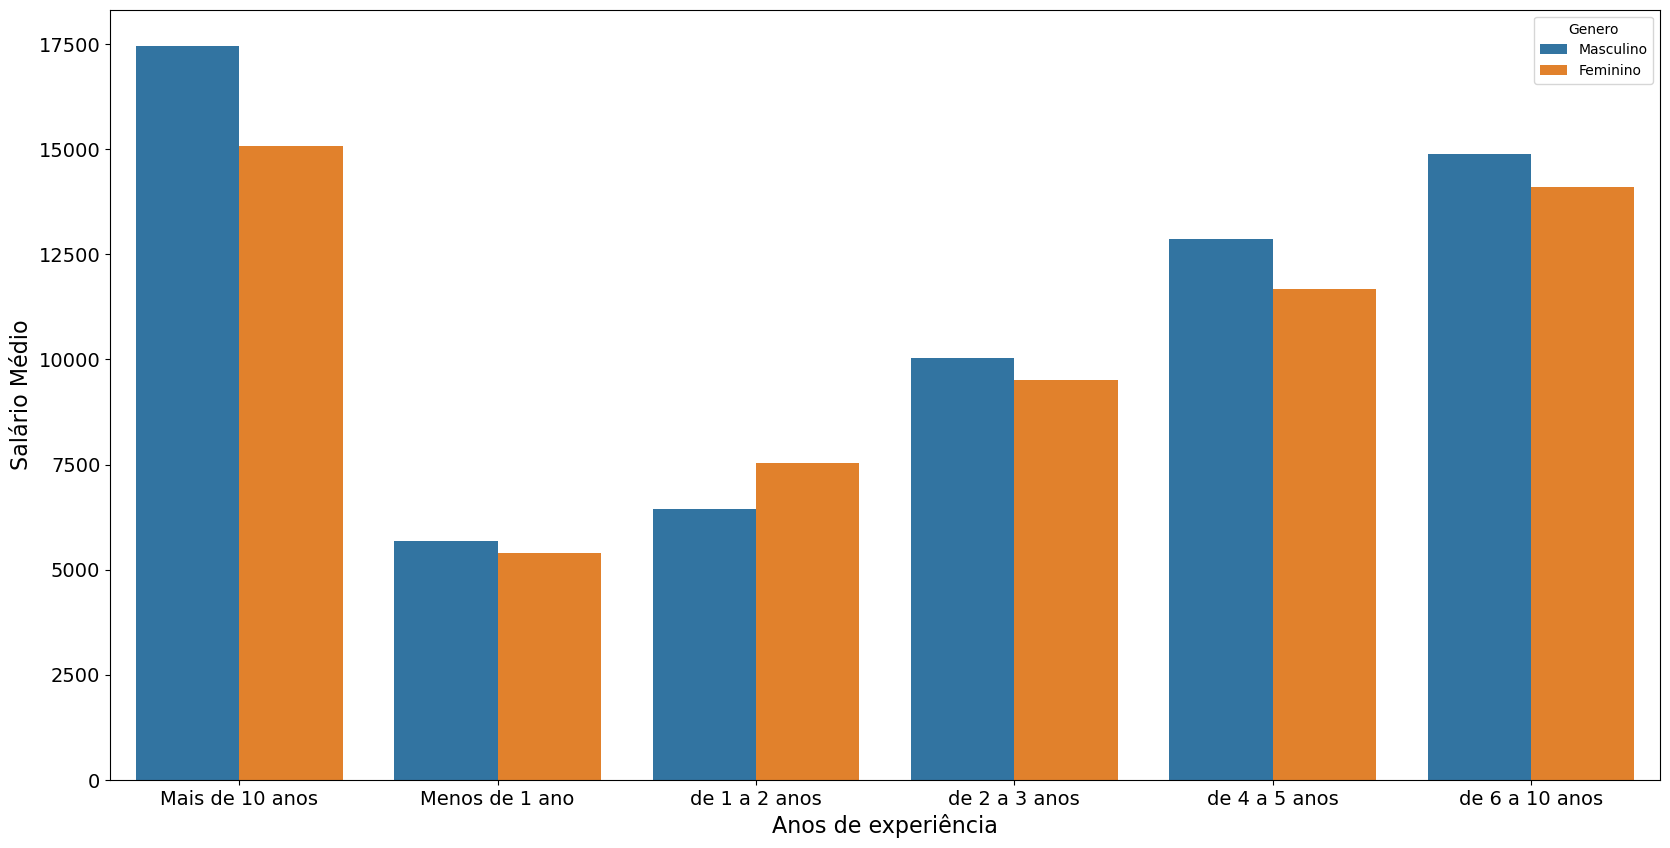

In [56]:
# Visualizando a média salarial por nível do cargo
plt.figure(figsize=(20, 10))
sns.barplot(x='Anos experiencia', y='Salario Medio', hue='Genero', data=media_anos_experiencia, hue_order=['Masculino', 'Feminino'])

# Nomeando os eixos
plt.ylabel('Salário Médio', fontsize = 16)
plt.xlabel('Anos de experiência', fontsize = 16)

# Aumentar o tamanho do texto dos eixos
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)